In [1]:
import sys
import os
from rdkit import Chem
sys.path.append(os.getcwd())
import chiral_client
import chiral_client
print(f'chiral client version: {chiral_client.version}')
# register a user at cloud.chiral.one, get the token api from the page "Profile"
user_email = os.environ['CHIRAL_USER_EMAIL']
token_api = os.environ['CHIRAL_TOKEN_API']

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
chiral client version: 0.2.1


In [2]:
def create_client() -> chiral_client.Client:
    chiral_computing_host = "api.chiral.one"
    chiral_computing_port = "20000"
    options=[
        ('grpc.max_receive_message_length', 10 * 1000 * 1000),
    ]
    return chiral_client.Client(user_email, token_api, chiral_computing_host, chiral_computing_port, options)

cc = create_client()
job_mgr = chiral_client.RecGenJobManager()
data_dir = './data/recgen' 

In [ ]:
outputs = []
for (mol_file, result_count) in [
    # 1-step transformation with fragment db of drug bank
    # ('sample1', 1117), 
    # ('sample4', 33),
    # # 1-step transformation with fragment db of kegg 
    # ('sample1', 1050), 
    # ('sample4', 44),
    # # 2-step transformation with fragment db of drug bank 
    # ('sample2', 80424), # 80784 from recgen doc 
    # ('sample5', 14508), # 15210 from recgen doc
]:
    with open(f'{data_dir}/{mol_file}.mol') as f:
        input_mol = f.read()
        f.close()
    job_id = job_mgr.submit_job(cc, input_mol)
    cc.wait_until_completion(job_id)
    (output, error) = job_mgr.get_output(cc, job_id)
    outputs.append(output)
    assert len(output) == result_count
    assert error == ''

Demo of 1-Step Virtual Library Generation


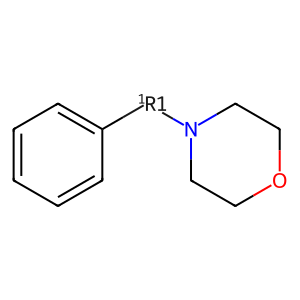

In [3]:
print('Demo of 1-Step Virtual Library Generation')
sample_file = f'{data_dir}/sample4.mol'
sample = Chem.MolFromMolFile(sample_file)
Chem.Draw.MolToImage(sample)

Running ReCGen in Cloud ...
using fragment db DrugBank_M.db and divisor 40
33 new molecules generated
The skeleton and the first 15 molecules presented here


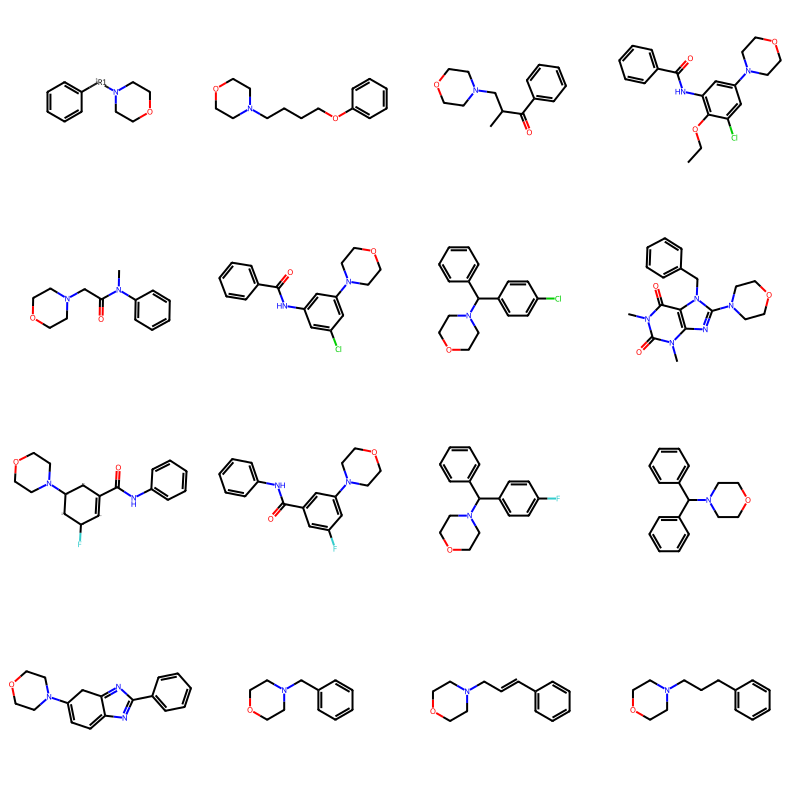

In [4]:
with open(sample_file) as f:
    input_mol = f.read()
    f.close()
print(f'Running ReCGen in Cloud ...')
job_id = job_mgr.submit_job(cc, input_mol)
cc.wait_until_completion(job_id)
(output, error) = job_mgr.get_output(cc, job_id)
print(f'{len(output)} new molecules generated')
print(f'The skeleton and the first 15 molecules presented here')
generated_mols = [Chem.MolFromSmiles(s) for s in output[:15]]

Chem.Draw.MolsToGridImage([sample] + generated_mols, molsPerRow=4, subImgSize=(200,200))    

Demo of 2-Step Virtual Library Generation


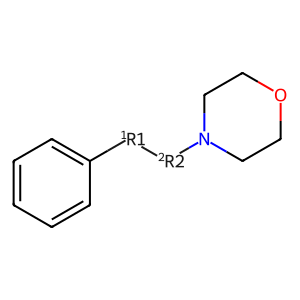

In [5]:
print('Demo of 2-Step Virtual Library Generation')
sample_file = f'{data_dir}/sample5.mol'
sample = Chem.MolFromMolFile(sample_file)
Chem.Draw.MolToImage(sample)

Running ReCGen in Cloud ...
using fragment db DrugBank_M.db and divisor 40
14508 new molecules generated
The skeleton and the first 15 molecules presented here


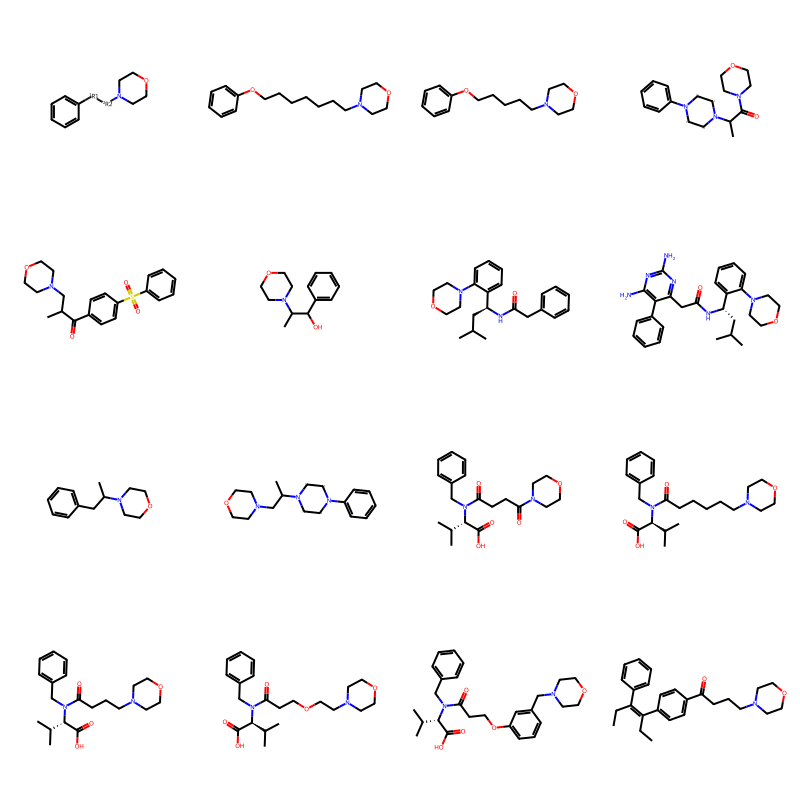

In [6]:
with open(sample_file) as f:
    input_mol = f.read()
    f.close()
print(f'Running ReCGen in Cloud ...')
job_id = job_mgr.submit_job(cc, input_mol)
cc.wait_until_completion(job_id)
(output, error) = job_mgr.get_output(cc, job_id)
print(f'{len(output)} new molecules generated')
print(f'The skeleton and the first 15 molecules presented here')
generated_mols = [Chem.MolFromSmiles(s) for s in output[:15]]

Chem.Draw.MolsToGridImage([sample] + generated_mols, molsPerRow=4, subImgSize=(200,200))    